# Single Character Network

The purpose of this network is to identify which alphanumeric value a CAPTCHA character and takes a centered 32x32 input.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import image_preprocess as img_pp

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
y_pos = np.load('data/y_single_pos.npy')
y_label = np.load('data/y_single_label.npy')
x = np.load('data/x_single.npy')
centered_labels = y_label[np.nonzero(y_pos)]
centered_x = x[np.nonzero(y_pos)]

np.save("data/x_single_centered.npy", centered_x)
np.save("data/y_single_label_centered.npy", centered_labels)

In [80]:
x, y = img_pp.preprocess_image_data('data/x_single_centered.npy', 'data/y_single_label_centered.npy')
print(f"x shape: {x.shape}")
print(f'y shape: {y.shape}')

x shape: (11700, 32, 32, 1)
y shape: (11700,)


In [90]:
x_train, x_val, x_test, x_train_dev, x_val_dev, y_train, y_val, y_test, y_train_dev, y_val_dev = img_pp.split('data/x_single_centered_preprocessed.npy', 'data/y_single_label_centered_preprocessed.npy', split_ratio = 0.6,  test_split = 1000)



In [118]:
# single character recognition
single = models.Sequential()
#CNN layer
single.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layer
single.add(layers.Flatten())
single.add(layers.Dense(64, activation='relu'))
single.add(layers.Dense(62)) 
# change to total alphanumeric  unique values
# change cross entropy to 

single.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [119]:
print(x_train_dev.shape, y_train_dev.shape)
print(x_val_dev.shape, y_val_dev.shape)
print(np.unique(y_label))

ind2char = {}
for i, char in enumerate(np.unique(y_label)):
    ind2char[i] = char
    char2ind[char] = i
  
#print(char2ind['B'])
#print(ind2char[11])

y_train_dev_ind = np.vectorize(char2ind.get)(y_train_dev)
print(y_train_dev[0:5])
print(y_train_dev_ind[0:5])
y_val_dev_ind = np.vectorize(char2ind.get)(y_val_dev)


(3000, 32, 32, 1) (3000,)
(500, 32, 32, 1) (500,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
['M' 'w' 'W' 'n' 'z']
[22 58 32 49 61]


In [122]:
#Training Network
single.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


single_history = single.fit(x_train_dev, y_train_dev_ind, epochs=40, 
                    validation_data=(x_val_dev, y_val_dev_ind))


Epoch 1/40
94/94 [==============================] - 1s 10ms/step - loss: 1.4981 - accuracy: 0.5697 - val_loss: 1.8818 - val_accuracy: 0.5040
Epoch 2/40
94/94 [==============================] - 1s 9ms/step - loss: 1.3827 - accuracy: 0.5953 - val_loss: 1.7803 - val_accuracy: 0.5080
Epoch 3/40
94/94 [==============================] - 1s 9ms/step - loss: 1.3029 - accuracy: 0.6143 - val_loss: 1.7670 - val_accuracy: 0.5160
Epoch 4/40
94/94 [==============================] - 1s 9ms/step - loss: 1.2050 - accuracy: 0.6420 - val_loss: 1.7052 - val_accuracy: 0.5380
Epoch 5/40
94/94 [==============================] - 1s 9ms/step - loss: 1.1355 - accuracy: 0.6623 - val_loss: 1.6895 - val_accuracy: 0.5400
Epoch 6/40
94/94 [==============================] - 1s 9ms/step - loss: 1.0931 - accuracy: 0.6680 - val_loss: 1.7881 - val_accuracy: 0.5140
Epoch 7/40
94/94 [==============================] - 1s 9ms/step - loss: 1.0283 - accuracy: 0.6947 - val_loss: 1.6385 - val_accuracy: 0.5600
Epoch 8/40
94/94 [=

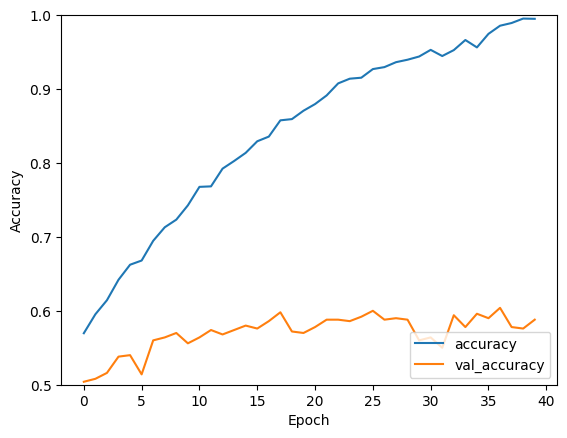

In [123]:
#Plotting Training Data
plt.plot(single_history.history['accuracy'], label='accuracy')
plt.plot(single_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


AttributeError: module 'tensorflow' has no attribute 'Session'